# 5. Flux simulation, visualization, and further analyses

In [1]:
import sys
from pathlib import Path
sys.path.append(str(Path("../../../").resolve()))

%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

from pipeGEM import load_remote_model
from pipeGEM.data import get_syn_gene_data
from pipeGEM.utils import random_perturb
from pipeGEM import Group
import matplotlib.pyplot as plt

In [3]:
ecoli = load_remote_model("e_coli_core")

Set parameter Username
Academic license - for non-commercial use only - expires 2024-02-28


In [8]:
group = Group({"ecoli_g1": {"e11": ecoli, 
                            "e12": random_perturb(ecoli.copy(), structure_ratio=0.99),
                            "e13": random_perturb(ecoli.copy(), structure_ratio=1, constr_ratio=0.88)},
                "ecoli_g2": {"e21": random_perturb(ecoli.copy(), structure_ratio=0.99, constr_ratio=0.9), 
                             "e22": ecoli,
                            "e23": random_perturb(ecoli.copy(), structure_ratio=0.99, constr_ratio=0.8),}}, name_tag="G2",
                treatments={"e11": "A", "e12": "B", "e13": "A", "e21": "B", "e22": "A", "e23": "A"})

Read LP format model from file C:\Users\user\AppData\Local\Temp\tmpk7yb_vqe.lp
Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file C:\Users\user\AppData\Local\Temp\tmpz6z5798f.lp
Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file C:\Users\user\AppData\Local\Temp\tmp2lw6fard.lp
Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file C:\Users\user\AppData\Local\Temp\tmpu16a5b1l.lp
Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros


## pFBA / FBA

#### do_flux_analysis

In [9]:
pFBA_result = group.do_flux_analysis(method="pFBA")

In [10]:
pFBA_result

FBA_Analysis at 0x15266773ee0

-----------
Parameters:
{'categorical': {'model', 'group_name', 'treatments'}, 'name': 'G2', 'group_by': 'model', 'group': {'model': ['e11', 'e12', 'e13', 'e21', 'e22', 'e23']}}
-----------
Result keys:
group_annotation, rxn_annotation, flux_df

In [11]:
pFBA_result.group_annotation

,n_rxns,n_genes,n_mets,group_name,treatments
e11,95,137,72,ecoli_g1,A
e12,94,135,72,ecoli_g1,B
e13,95,137,72,ecoli_g1,A
e21,94,135,72,ecoli_g2,B
e22,95,137,72,ecoli_g2,A
e23,94,135,72,ecoli_g2,A


#### plot a bar plot for the analysis

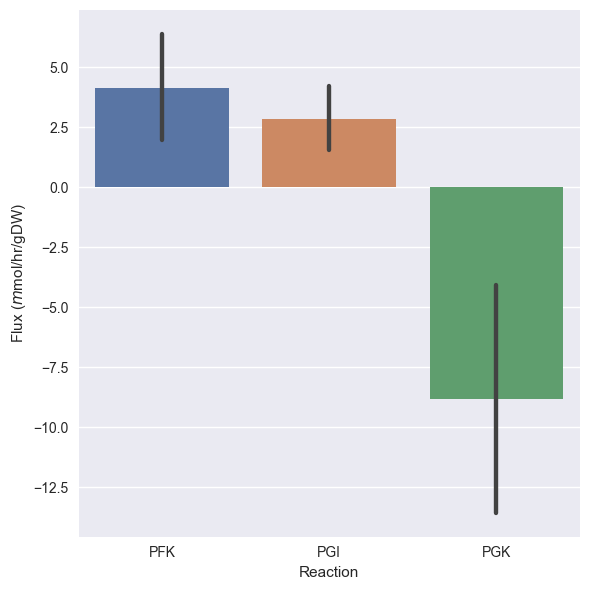

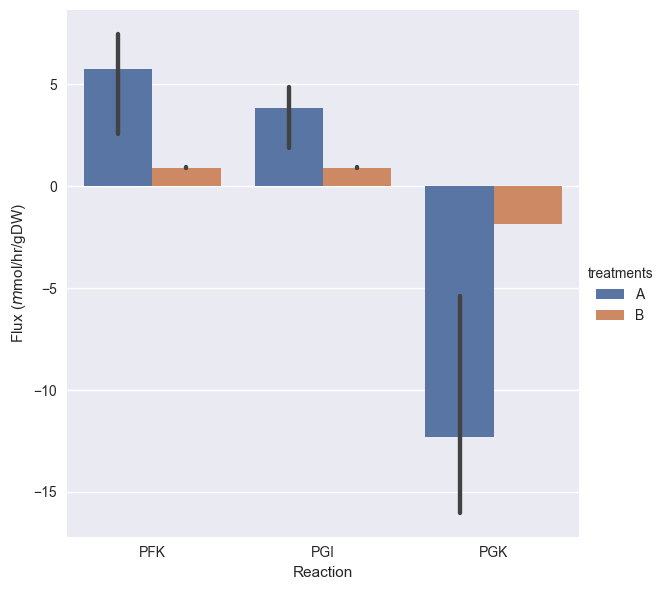

In [12]:
pFBA_result.plot(rxn_ids=["PFK", "PGI", "PGK"], aspect=1)
pFBA_result.plot(rxn_ids=["PFK", "PGI", "PGK"], group_by="treatments", aspect=1)

#### correlation, dimensionality reduction

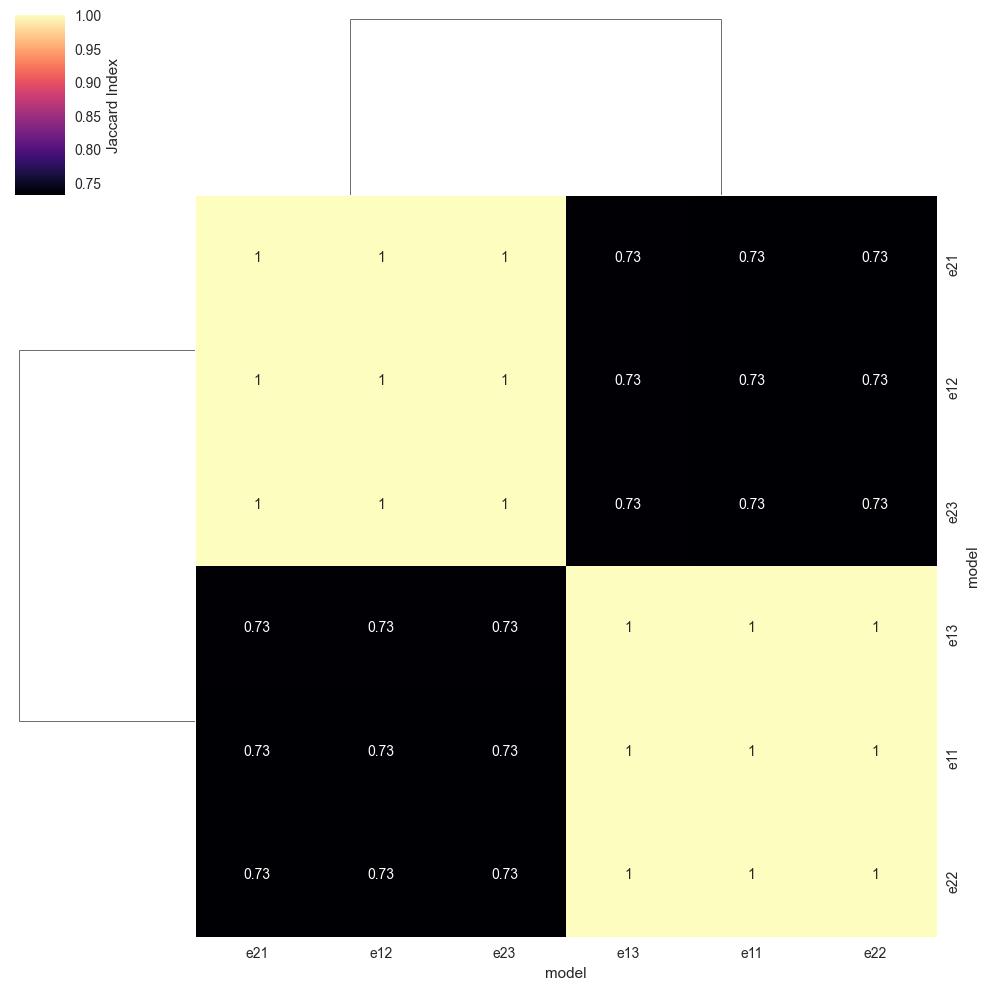

In [13]:
corr_result = pFBA_result.corr(rxn_corr=False, group_by="model")
corr_result.plot(annot=True)

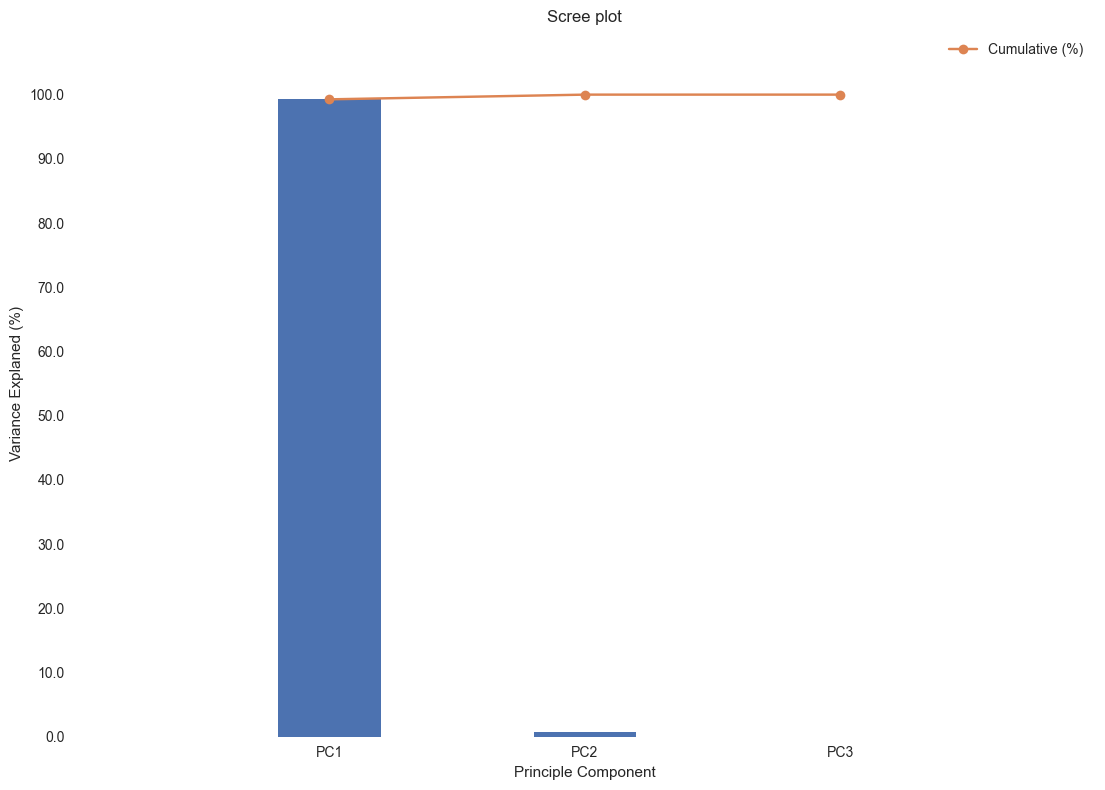

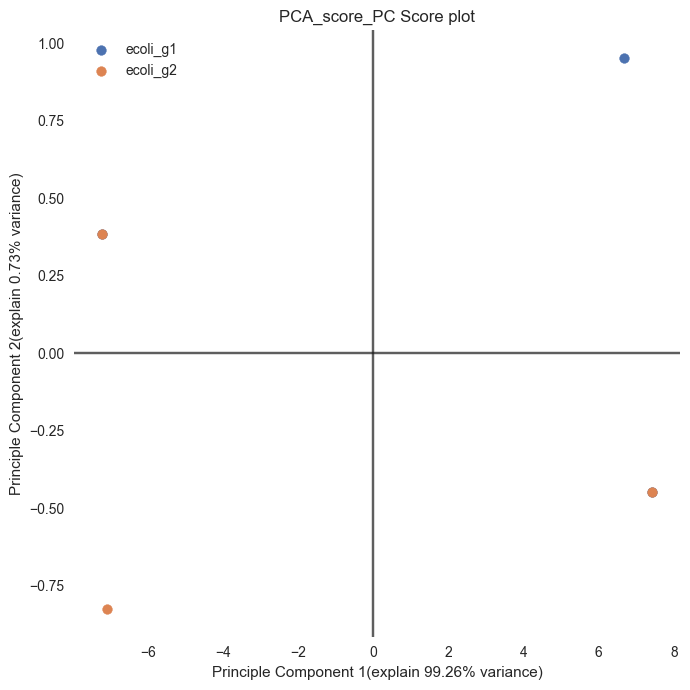

In [14]:
pca_result = pFBA_result.dim_reduction(method="PCA", 
                                       n_components=3, 
                                       standardize=True,)

pca_result.plot()

#### statistical tests

In [16]:
diff_test = pFBA_result.diff_test(between="treatments")

  0%|                                                                                          | 0/567 [00:00<?, ?it/s]


A
0.6632159948348999
B


ValueError: Data must be at least length 3.

In [16]:
pFBA_result.flux_df

,Reaction,fluxes,reduced_costs,model,group_name,treatments
0,PFK,7.477382,-2.000000,e11,ecoli_g1,A
1,PFL,0.000000,5.733333,e11,ecoli_g1,A
2,PGI,4.860861,-2.000000,e11,ecoli_g1,A
3,PGK,-16.023526,2.000000,e11,ecoli_g1,A
4,PGL,4.959985,-2.000000,e11,ecoli_g1,A
...,...,...,...,...,...,...
373,NADH16,38.534610,-2.000000,e22,ecoli_g2,A
374,NADTRHD,0.000000,1.422222,e22,ecoli_g2,A
375,NH4t,4.765319,-2.000000,e22,ecoli_g2,A
376,O2t,21.799493,-2.000000,e22,ecoli_g2,A


## FVA

## Randomized sampling

## Obtain data-consistent flux distribution